# Virus spread sim

Social distancing: limits amount of movement in the population

Mortality: how likely you are to die during the length of infection. Spread evenly across each iteration for simplicity

Virality: how likely you are to get infected after coming into contact with an infectious person

Immunity last: how much immunity does surviving a virus give you

Length of infection: number of iterations before you recover

# First coding the population

In [7]:
import random
import matplotlib.pyplot as plt
class person:
    def __init__(self, social_distancing=0, morality=0, virality=1, immunitylast=0, length_of_infection=0, isinfected=False, time_of_recover=15, space=(100,100)):
        self.social_distancing = social_distancing
        self.morality = morality
        self.virality = virality
        self.immunitylast = immunitylast
        self.length_of_infection = length_of_infection
        self.x = random.randint(0, space[0])
        self.y = random.randint(0, space[1])
        self.isinfected = isinfected
        self.time_of_recover = time_of_recover
        
    def returndata(self):
        return (self.social_distancing, self.morality, self.virality, self.immunitylast, self.length_of_infection, self.isinfected, self.time_of_recover, self.x, self.y)

In [4]:
firstperson = person()
print(firstperson.returndata())

(0, 0, 1, 0, 0, False, 15, 25, 63)


# Movement

In [43]:
class person:
    def __init__(self, social_distancing=0, morality=0, virality=1, immunitylast=0, length_of_infection=0, isinfected=False, time_of_recover=15, space=(100,100)):
        self.social_distancing = social_distancing
        self.morality = morality
        self.virality = virality
        self.immunitylast = immunitylast
        self.length_of_infection = length_of_infection
        self.x = random.randint(0, space[0])
        self.y = random.randint(0, space[1])
        self.isinfected = isinfected
        self.time_of_recover = time_of_recover
        
    def returndata(self):
        return (self.social_distancing, self.morality, self.virality, self.immunitylast, self.length_of_infection, self.isinfected, self.time_of_recover, self.x, self.y)
    
    def movement(self):
        move = random.random() * 2
        total_movement = 2
        if self.social_distancing != 0:
            minusmove = move / 2
            move -= self.social_distancing * minusmove * 2
            if move < 0:
                move = 0
            total_movement -= self.social_distancing * 2
        if random.randint(0,1) == 1:
            self.x += move
        else:
            self.x -= move
        if random.randint(0,1) == 1:
            self.y += total_movement - move
        else:
            self.y -= total_movement - move

In [44]:
firstperson = person()
print(firstperson.returndata())
firstperson.movement()
print(firstperson.returndata())

(0, 0, 1, 0, 0, False, 15, 26, 46)
(0, 0, 1, 0, 0, False, 15, 24.536998039895728, 46.53699803989573)


Now lets add social distancing

In [45]:
firstperson = person(social_distancing=0.7)
print(firstperson.returndata())
firstperson.movement()
print(firstperson.returndata())

(0.7, 0, 1, 0, 0, False, 15, 14, 26)
(0.7, 0, 1, 0, 0, False, 15, 13.679100096179432, 26.279100096179434)


Now lets make sure that they don't leave the area

In [111]:
class person:
    def __init__(self, social_distancing=0, mortality=0, virality=1, immunitylast=0, length_of_infection=0, isinfected=False, time_of_recover=15, space=(100,100)):
        self.social_distancing = social_distancing
        self.morality = mortality
        self.virality = virality
        self.immunitylast = immunitylast
        self.length_of_infection = length_of_infection
        self.x = random.randint(0, space[0])
        self.y = random.randint(0, space[1])
        self.isinfected = isinfected
        self.time_of_recover = time_of_recover
        self.space = space
        
    def returndata(self):
        return (self.social_distancing, self.morality, self.virality, self.immunitylast, self.length_of_infection, self.isinfected, self.time_of_recover, self.x, self.y)
    
    def movement(self):
        move = random.random() * 2
        total_movement = 2
        if self.social_distancing != 0:
            minusmove = move / 2
            move -= self.social_distancing * minusmove * 2
            if move < 0:
                move = 0
            total_movement -= self.social_distancing * 2
        if random.randint(0,1) == 1:
            self.x += move
        else:
            self.x -= move
        if random.randint(0,1) == 1:
            self.y += total_movement - move
        else:
            self.y -= total_movement - move
        if self.y < 0:
            self.y = self.y * -1
        elif self.y > self.space[1]:
            self.y -= self.y - self.space[1]
        if self.x < 0:
            self.x = self.x * -1
        elif self.x > self.space[0]:
            self.x -= self.x - self.space[0]

# Infecting

In [493]:
class person:
    def __init__(self, social_distancing=0, mortality=0, virality=1, immunitylast=0, length_of_infection=0, isinfected=False, time_of_recover=15, space=(100,100)):
        self.social_distancing = social_distancing
        self.morality = mortality
        self.virality = virality
        self.immunitylast = immunitylast
        self.length_of_infection = length_of_infection
        self.x = random.randint(0, space[0])
        self.y = random.randint(0, space[1])
        self.isinfected = isinfected
        self.time_of_recover = time_of_recover
        self.space = space
        
    def returndata(self):
        return (self.social_distancing, self.morality, self.virality, self.immunitylast, self.length_of_infection, self.isinfected, self.time_of_recover, self.x, self.y)
    
    def movement(self):
        move = random.random() * 2
        total_movement = 2
        if self.social_distancing != 0:
            minusmove = move / 2
            move -= self.social_distancing * minusmove * 2
            if move < 0:
                move = 0
            total_movement -= self.social_distancing * 2
        if random.randint(0,1) == 1:
            self.x += move
        else:
            self.x -= move
        if random.randint(0,1) == 1:
            self.y += total_movement - move
        else:
            self.y -= total_movement - move
        if self.y < 0:
            self.y = self.y * -1
        elif self.y > self.space[1]:
            self.y -= self.y - self.space[1]
        if self.x < 0:
            self.x = self.x * -1
        elif self.x > self.space[0]:
            self.x -= self.x - self.space[0]
            
    def infection(self):
        self.isinfected = True

Most of the checking if someone is infected will be calculated outside of the class

So lets make a couple people to test this

In [311]:
def makepeople(amount=1, social_distancing=0, mortality=0, virality=1, immunitylast=15, length_of_infection=0, isinfected=False, time_of_recover=15, space=(100,100)):
    global person
    people = []
    for i in range(amount):
        per = person(social_distancing, mortality, virality, immunitylast, length_of_infection, isinfected, time_of_recover, space)
        people.append(per)
    return people
people = makepeople(4)
for i in people:
    print(i.returndata())

(0, 0, 1, 10, 0, False, 15, 47, 29, False, 10, 0)
(0, 0, 1, 10, 0, False, 15, 0, 77, False, 10, 0)
(0, 0, 1, 10, 0, False, 15, 51, 80, False, 10, 0)
(0, 0, 1, 10, 0, False, 15, 83, 6, False, 10, 0)


Now lets make one of them infected

In [57]:
def makepeople(amount=1, social_distancing=0, mortality=0, virality=1, immunitylast=15, length_of_infection=0, time_of_recover=15, space=(100,100)):
    global person
    people = []
    num = random.randint(0,amount-1)
    for i in range(amount):
        if i == num:
            per = person(social_distancing, mortality, virality, immunitylast, length_of_infection, isinfected=True, time_of_recover=time_of_recover, space=space)
        else:
            per = person(social_distancing, mortality, virality, immunitylast, length_of_infection, time_of_recover=time_of_recover, space=space, isinfected=False)
        people.append(per)
    return people
people = makepeople(4)
for i in people:
    print(i.returndata())

(0, 0, 1, 15, 0, False, 15, 56, 15, False)
(0, 0, 1, 15, 0, False, 15, 87, 59, False)
(0, 0, 1, 15, 0, False, 15, 6, 92, False)
(0, 0, 1, 15, 0, True, 15, 98, 34, False)


Lets make the space a bit smaller

In [73]:
people = makepeople(4, space=(4,4))
for i in people:
    print(i.returndata())

(0, 0, 1, 0, 0, False, 15, 1, 2)
(0, 0, 1, 0, 0, False, 15, 0, 2)
(0, 0, 1, 0, 0, False, 15, 0, 0)
(0, 0, 1, 0, 0, True, 15, 4, 0)


Now lets make it so if two people are in the same square and one has the virus it will have a chance to infect the healthy person depending on the virality

We'll start with just setting off infection if one infected and one healthy person is in the same position

In [106]:
def performsim(reps, people):
    for t in range(reps):
        currentdata = []
        for i in people:
            currentdata.append(i.returndata()[7:9])
        a = 0
        for m in currentdata:
            for c in range(len(currentdata)):
                if int(currentdata[a][0]) == int(currentdata[c][0]) and a != c and int(currentdata[a][1]) == int(currentdata[c][1]):
                    if (people[a].returndata()[5] == True or people[c].returndata()[5] == True) and people[a].returndata()[5] != people[c].returndata()[5]:
                        if people[a].returndata()[5] == False:
                            people[a].infection()
                        else:
                            people[c].infection()
            a += 1
        for i in people:
            print(i.returndata())
people = makepeople(4, space=(4,4))
performsim(1, people)

(0, 0, 1, 0, 0, False, 15, 0, 0)
(0, 0, 1, 0, 0, False, 15, 3, 0)
(0, 0, 1, 0, 0, True, 15, 4, 4)
(0, 0, 1, 0, 0, True, 15, 4, 4)


Seems that is works, now lets add some movement

In [118]:
def performsim(reps, people):
    for t in range(reps):
        currentdata = []
        for i in people:
            currentdata.append(i.returndata()[7:9])
        a = 0
        for m in currentdata:
            for c in range(len(currentdata)):
                if int(currentdata[a][0]) == int(currentdata[c][0]) and a != c and int(currentdata[a][1]) == int(currentdata[c][1]):
                    if (people[a].returndata()[5] == True or people[c].returndata()[5] == True) and people[a].returndata()[5] != people[c].returndata()[5]:
                        if people[a].returndata()[5] == False:
                            people[a].infection()
                        else:
                            people[c].infection()
            a += 1
        for i in people:
            print(i.returndata())
            i.movement()
people = makepeople(4, space=(4,4))
performsim(5, people)

(0, 0, 1, 0, 0, False, 15, 4, 3)
(0, 0, 1, 0, 0, False, 15, 1, 0)
(0, 0, 1, 0, 0, False, 15, 0, 1)
(0, 0, 1, 0, 0, True, 15, 3, 2)
(0, 0, 1, 0, 0, False, 15, 4.0, 1.1005179281031885)
(0, 0, 1, 0, 0, False, 15, 1.1265016489480064, 1.8734983510519936)
(0, 0, 1, 0, 0, False, 15, 0.7337087774885336, 0.2662912225114664)
(0, 0, 1, 0, 0, True, 15, 1.6202664474793003, 2.6202664474793003)
(0, 0, 1, 0, 0, False, 15, 2.653099872611951, 0.4474180554912377)
(0, 0, 1, 0, 0, True, 15, 0.3253156995890347, 3.072312401693022)
(0, 0, 1, 0, 0, False, 15, 0.9322285815025859, 2.067771418497414)
(0, 0, 1, 0, 0, True, 15, 0.4844893644945365, 3.4844893644945367)
(0, 0, 1, 0, 0, False, 15, 3.789042855281478, 0.4166389618392352)
(0, 0, 1, 0, 0, True, 15, 1.5143490070256045, 2.261345709129592)
(0, 0, 1, 0, 0, True, 15, 1.0026656361926907, 2.002665636192691)
(0, 0, 1, 0, 0, True, 15, 1.0686493205738967, 2.068649320573897)
(0, 0, 1, 0, 0, False, 15, 4.0, 1.2184390699001562)
(0, 0, 1, 0, 0, True, 15, 2.0785593877062

It seems to work but lets make this a bit easier to see

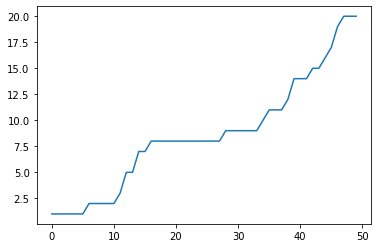

In [131]:
def performsim(reps, people):
    totalinfected = []
    for t in range(reps):
        currentdata = []
        for i in people:
            currentdata.append(i.returndata()[7:9])
        a = 0
        for m in currentdata:
            for c in range(len(currentdata)):
                if int(currentdata[a][0]) == int(currentdata[c][0]) and a != c and int(currentdata[a][1]) == int(currentdata[c][1]):
                    if (people[a].returndata()[5] == True or people[c].returndata()[5] == True) and people[a].returndata()[5] != people[c].returndata()[5]:
                        if people[a].returndata()[5] == False:
                            people[a].infection()
                        else:
                            people[c].infection()
            a += 1
        infected = 0
        for i in people:
            if i.returndata()[5] == True:
                infected += 1
            i.movement()
        totalinfected.append(infected)
    plt.plot(totalinfected)
        
people = makepeople(20, space=(10,10))
performsim(50, people)

Seems it works now lets add the virality

In [135]:
class person:
    def __init__(self, social_distancing=0, mortality=0, virality=1, immunitylast=0, length_of_infection=0, isinfected=False, time_of_recover=15, space=(100,100)):
        self.social_distancing = social_distancing
        self.morality = mortality
        self.virality = virality
        self.immunitylast = immunitylast
        self.length_of_infection = length_of_infection
        self.x = random.randint(0, space[0])
        self.y = random.randint(0, space[1])
        self.isinfected = isinfected
        self.time_of_recover = time_of_recover
        self.space = space
        
    def returndata(self):
        return (self.social_distancing, self.morality, self.virality, self.immunitylast, self.length_of_infection, self.isinfected, self.time_of_recover, self.x, self.y)
    
    def movement(self):
        move = random.random() * 2
        total_movement = 2
        if self.social_distancing != 0:
            minusmove = move / 2
            move -= self.social_distancing * minusmove * 2
            if move < 0:
                move = 0
            total_movement -= self.social_distancing * 2
        if random.randint(0,1) == 1:
            self.x += move
        else:
            self.x -= move
        if random.randint(0,1) == 1:
            self.y += total_movement - move
        else:
            self.y -= total_movement - move
        if self.y < 0:
            self.y = self.y * -1
        elif self.y > self.space[1]:
            self.y -= self.y - self.space[1]
        if self.x < 0:
            self.x = self.x * -1
        elif self.x > self.space[0]:
            self.x -= self.x - self.space[0]
            
    def infection(self):
        if random.random() < self.virality:
            self.isinfected = True

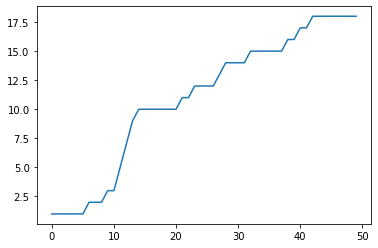

In [136]:
def performsim(reps, people):
    totalinfected = []
    for t in range(reps):
        currentdata = []
        for i in people:
            currentdata.append(i.returndata()[7:9])
        a = 0
        for m in currentdata:
            for c in range(len(currentdata)):
                if int(currentdata[a][0]) == int(currentdata[c][0]) and a != c and int(currentdata[a][1]) == int(currentdata[c][1]):
                    if (people[a].returndata()[5] == True or people[c].returndata()[5] == True) and people[a].returndata()[5] != people[c].returndata()[5]:
                        if people[a].returndata()[5] == False:
                            people[a].infection()
                        else:
                            people[c].infection()
            a += 1
        infected = 0
        for i in people:
            if i.returndata()[5] == True:
                infected += 1
            i.movement()
        totalinfected.append(infected)
    plt.plot(totalinfected)
        
people = makepeople(20, space=(10,10))
performsim(50, people)

At the moment virality is set to 1, so there is a 100% chance that an infected person will infect a healthy person in the same square

Lets change it to 0.2, so it will be 20% instead of 100%

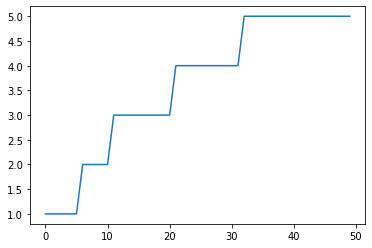

In [145]:
people = makepeople(20, space=(10,10), virality=0.2)
performsim(50, people)

As you can see, the end amount of infected is much smaller than the when the virality was 1

# Recovery time

In [147]:
class person:
    def __init__(self, social_distancing=0, mortality=0, virality=1, immunitylast=0, length_of_infection=0, isinfected=False, time_of_recover=15, space=(100,100)):
        self.social_distancing = social_distancing
        self.morality = mortality
        self.virality = virality
        self.immunitylast = immunitylast
        self.length_of_infection = length_of_infection
        self.x = random.randint(0, space[0])
        self.y = random.randint(0, space[1])
        self.isinfected = isinfected
        self.time_of_recover = time_of_recover
        self.space = space
        
    def returndata(self):
        return (self.social_distancing, self.morality, self.virality, self.immunitylast, self.length_of_infection, self.isinfected, self.time_of_recover, self.x, self.y)
    
    def movement(self):
        move = random.random() * 2
        total_movement = 2
        if self.social_distancing != 0:
            minusmove = move / 2
            move -= self.social_distancing * minusmove * 2
            if move < 0:
                move = 0
            total_movement -= self.social_distancing * 2
        if random.randint(0,1) == 1:
            self.x += move
        else:
            self.x -= move
        if random.randint(0,1) == 1:
            self.y += total_movement - move
        else:
            self.y -= total_movement - move
        if self.y < 0:
            self.y = self.y * -1
        elif self.y > self.space[1]:
            self.y -= self.y - self.space[1]
        if self.x < 0:
            self.x = self.x * -1
        elif self.x > self.space[0]:
            self.x -= self.x - self.space[0]
            
    def infection(self):
        if random.random() < self.virality:
            self.isinfected = True
            
    def recovery(self):
        if self.isinfected == True:
            if self.time_of_recover == self.length_of_infection:
                self.isinfected = False
                self.length_of_infection = 0
            else:
                self.length_of_infection += 1

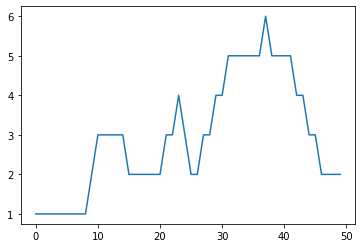

In [153]:
def performsim(reps, people):
    totalinfected = []
    for t in range(reps):
        currentdata = []
        for i in people:
            currentdata.append(i.returndata()[7:9])
        a = 0
        for m in currentdata:
            for c in range(len(currentdata)):
                if int(currentdata[a][0]) == int(currentdata[c][0]) and a != c and int(currentdata[a][1]) == int(currentdata[c][1]):
                    if (people[a].returndata()[5] == True or people[c].returndata()[5] == True) and people[a].returndata()[5] != people[c].returndata()[5]:
                        if people[a].returndata()[5] == False:
                            people[a].infection()
                        else:
                            people[c].infection()
            a += 1
        infected = 0
        for i in people:
            i.recovery()
            if i.returndata()[5] == True:
                infected += 1
            i.movement()
        totalinfected.append(infected)
    plt.plot(totalinfected)

people = makepeople(20, space=(10,10), virality=0.6)
performsim(50, people)

As you can see the infected now goes up down due to people recovering

But this is not realistic as people get immunity when getting the virus

In [371]:
class person:
    def __init__(self, social_distancing=0, mortality=0, virality=1, immunitylast=15, length_of_infection=0, isinfected=False, time_of_recover=15, space=(100,100)):
        self.social_distancing = social_distancing
        self.morality = mortality
        self.virality = virality
        self.immunitylast = immunitylast
        self.length_of_infection = length_of_infection
        self.x = random.randint(0, space[0])
        self.y = random.randint(0, space[1])
        self.isinfected = isinfected
        self.time_of_recover = time_of_recover
        self.timeofimmunity = 0
        self.space = space
        self.hasimmunity = False
        self.hasbeeninfected = False
        
    def returndata(self):
        return (self.social_distancing, self.morality, self.virality, self.immunitylast, self.length_of_infection, self.isinfected, self.time_of_recover, self.x, self.y, self.hasimmunity)
    
    def movement(self):
        move = random.random() * 2
        total_movement = 2
        if self.social_distancing != 0:
            minusmove = move / 2
            move -= self.social_distancing * minusmove * 2
            if move < 0:
                move = 0
            total_movement -= self.social_distancing * 2
        if random.randint(0,1) == 1:
            self.x += move
        else:
            self.x -= move
        if random.randint(0,1) == 1:
            self.y += total_movement - move
        else:
            self.y -= total_movement - move
        if self.y < 0:
            self.y = self.y * -1
        elif self.y > self.space[1]:
            self.y -= self.y - self.space[1]
        if self.x < 0:
            self.x = self.x * -1
        elif self.x > self.space[0]:
            self.x -= self.x - self.space[0]
            
    def infection(self):
        if random.random() < self.virality and self.hasimmunity == False:
            self.isinfected = True
            
    def recovery(self):
        if self.isinfected == True:
            if self.time_of_recover == self.length_of_infection:
                self.isinfected = False
                self.hasimmunity = True
                self.hasbeeninfected = True
                self.length_of_infection = 0
            else:
                self.length_of_infection += 1
                
    def immunitykept(self):
        if self.hasimmunity == True:
            self.timeofimmunity += 1
            if self.timeofimmunity == self.immunitylast:
                self.hasimmunity = False
                self.timeofimmunity = 0

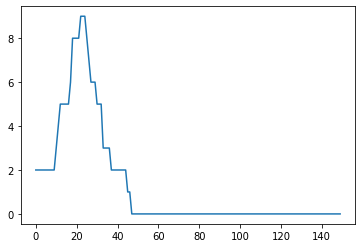

In [350]:
def performsim(reps, people):
    totalinfected = []
    for t in range(reps):
        currentdata = []
        for i in people:
            currentdata.append(i.returndata()[7:9])
        a = 0
        for m in currentdata:
            for c in range(len(currentdata)):
                if int(currentdata[a][0]) == int(currentdata[c][0]) and a != c and int(currentdata[a][1]) == int(currentdata[c][1]):
                    if (people[a].returndata()[5] == True or people[c].returndata()[5] == True) and people[a].returndata()[5] != people[c].returndata()[5]:
                        if people[a].returndata()[5] == False:
                            people[a].infection()
                        else:
                            people[c].infection()
            a += 1
        infected = 0
        for i in people:
            i.recovery()
            i.immunitykept()
            if i.returndata()[5] == True:
                infected += 1
            i.movement()
        totalinfected.append(infected)
    plt.plot(totalinfected)
people = makepeople(20, space=(10,10), virality=0.6)
performsim(150, people)

As you can see the infected goes to 0 as the people become immune to the disease

Lets record the immunity and the infected

In [8]:
def performsim(reps, people):
    totalinfected = []
    totalimmunity = []
    for t in range(reps):
        currentdata = []
        for i in people:
            currentdata.append(i.returndata()[7:9])
        a = 0
        for m in currentdata:
            for c in range(len(currentdata)):
                if int(currentdata[a][0]) == int(currentdata[c][0]) and a != c and int(currentdata[a][1]) == int(currentdata[c][1]):
                    if (people[a].returndata()[5] == True or people[c].returndata()[5] == True) and people[a].returndata()[5] != people[c].returndata()[5]:
                        if people[a].returndata()[5] == False:
                            people[a].infection()
                        else:
                            people[c].infection()
            a += 1
        infected = 0
        immune = 0
        for i in people:
            i.recovery()
            i.immunitykept()
            if i.returndata()[5] == True:
                infected += 1
            if i.returndata()[9] == True:
                immune += 1
            i.movement()
        totalinfected.append(infected)
        totalimmunity.append(immune)
    plt.plot(totalinfected)
    plt.plot(totalimmunity)

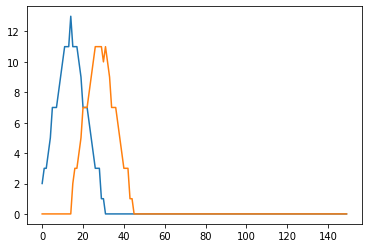

In [369]:
people = makepeople(20, space=(10,10), virality=0.9)
performsim(150, people)

immunity = orange, infected = blue

Now if we change the amount of time the immunity lasts for

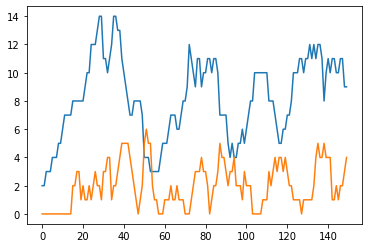

In [370]:
people = makepeople(20, space=(10,10), virality=0.9, immunitylast=5)
performsim(150, people)

As you can see the virus continues

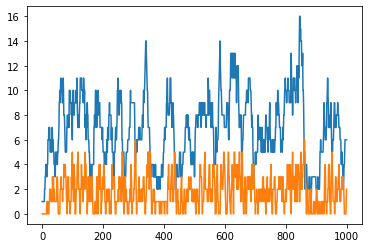

In [338]:
people = makepeople(20, space=(10,10), virality=0.9, immunitylast=5)
performsim(1000, people)

And if we repeat it lots of times it continues on for longer due to the immunity not lasting

# Mortality

In [54]:
class person:
    def __init__(self, social_distancing=0, mortality=1, virality=1, immunitylast=15, length_of_infection=0, isinfected=False, time_of_recover=15, space=(100,100)):
        self.social_distancing = social_distancing
        self.morality = mortality
        self.virality = virality
        self.immunitylast = immunitylast
        self.length_of_infection = length_of_infection
        self.x = random.randint(0, space[0])
        self.y = random.randint(0, space[1])
        self.isinfected = isinfected
        self.time_of_recover = time_of_recover
        self.timeofimmunity = 0
        self.space = space
        self.hasimmunity = False
        self.hasbeeninfected = False
        
    def returndata(self):
        return (self.social_distancing, self.morality, self.virality, self.immunitylast, self.length_of_infection, self.isinfected, self.time_of_recover, self.x, self.y, self.hasimmunity)
    
    def movement(self):
        move = random.random() * 2
        total_movement = 2
        if self.social_distancing != 0:
            minusmove = move / 2
            move -= self.social_distancing * minusmove * 2
            if move < 0:
                move = 0
            total_movement -= self.social_distancing * 2
        if random.randint(0,1) == 1:
            self.x += move
        else:
            self.x -= move
        if random.randint(0,1) == 1:
            self.y += total_movement - move
        else:
            self.y -= total_movement - move
        if self.y < 0:
            self.y = self.y * -1
        elif self.y > self.space[1]:
            self.y -= self.y - self.space[1]
        if self.x < 0:
            self.x = self.x * -1
        elif self.x > self.space[0]:
            self.x -= self.x - self.space[0]
            
    def infection(self):
        if random.random() < self.virality and self.hasimmunity == False:
            self.isinfected = True
            
    def recovery(self):
        if self.isinfected == True:
            if self.time_of_recover == self.length_of_infection:
                self.isinfected = False
                self.hasimmunity = True
                self.hasbeeninfected = True
                self.length_of_infection = 0
            else:
                self.length_of_infection += 1
                
    def immunitykept(self):
        if self.hasimmunity == True:
            self.timeofimmunity += 1
            if self.timeofimmunity == self.immunitylast:
                self.hasimmunity = False
                self.timeofimmunity = 0
    def dying(self):
        dead = False
        if self.isinfected == True:
            if random.random() <= self.morality:
                dead = True
        return dead

In [10]:
def performsim(reps, people):
    totalinfected = []
    totalimmunity = []
    for t in range(reps):
        currentdata = []
        for i in people:
            currentdata.append(i.returndata()[7:9])
        a = 0
        for m in currentdata:
            for c in range(len(currentdata)):
                if int(currentdata[a][0]) == int(currentdata[c][0]) and a != c and int(currentdata[a][1]) == int(currentdata[c][1]):
                    if (people[a].returndata()[5] == True or people[c].returndata()[5] == True) and people[a].returndata()[5] != people[c].returndata()[5]:
                        if people[a].returndata()[5] == False:
                            people[a].infection()
                        else:
                            people[c].infection()
            a += 1
        infected = 0
        immune = 0
        num = 0
        for i in people:
            i.recovery()
            i.immunitykept()
            isdead = i.dying()
            if isdead == True:
                people.pop(num)
                num += 1
            if i.returndata()[5] == True:
                infected += 1
            if i.returndata()[9] == True:
                immune += 1
            i.movement()
        totalinfected.append(infected)
        totalimmunity.append(immune)
    plt.plot(totalinfected)
    plt.plot(totalimmunity)

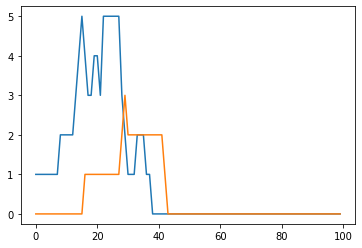

In [472]:
people = makepeople(20, space=(10,10), morality=0.1)
performsim(100, people)

As you can see people aren't lasting long due to them dying if they are infected

Lets see the dead people

In [58]:
def performsim(reps, people, numnum):
    totalinfected = []
    totalimmunity = []
    totaldead = []
    num = 0
    for t in range(reps):
        currentdata = []
        for i in people:
            currentdata.append(i.returndata()[7:9])
        a = 0
        for m in currentdata:
            for c in range(len(currentdata)):
                if int(currentdata[a][0]) == int(currentdata[c][0]) and a != c and int(currentdata[a][1]) == int(currentdata[c][1]):
                    if (people[a].returndata()[5] == True or people[c].returndata()[5] == True) and people[a].returndata()[5] != people[c].returndata()[5]:
                        if people[a].returndata()[5] == False:
                            people[a].infection()
                        else:
                            people[c].infection()
            a += 1
        infected = 0
        immune = 0
        numnum = 0
        for i in people:
            i.recovery()
            i.immunitykept()
            isdead = i.dying()
            if isdead == True:
                people.pop(numnum)
                numnum -= 1
                num += 1
            if i.returndata()[5] == True:
                infected += 1
            if i.returndata()[9] == True:
                immune += 1
            i.movement()
            numnum += 1
        totaldead.append(num)
        totalinfected.append(infected)
        totalimmunity.append(immune)
    plt.plot(totalinfected)
    plt.plot(totalimmunity)
    plt.plot(totaldead)

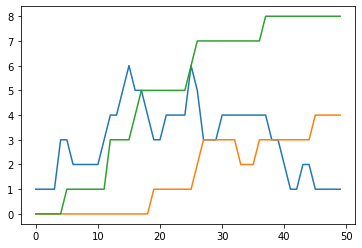

In [66]:
num = 20
people = makepeople(num, space=(10,10), mortality=0.1)
performsim(50, people, num)

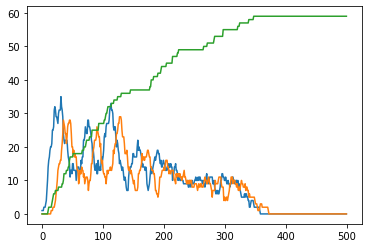

In [67]:
num = 100
people = makepeople(num, space=(10,10), mortality=0.01, social_distancing=0.7, virality=0.7)
performsim(500, people, num)

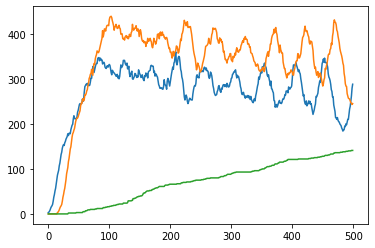

In [68]:
num = 1000
people = makepeople(num, space=(50,50), mortality=0.001, social_distancing=0.1, virality=0.7, immunitylast=20)
performsim(500, people, num)

# Adding other variables

Now we're going to more variables ie hospitals, natural immuminity, prior health problems, ect

Some of these variables will be applied inside the class and others out

Some variables will affect more than others

## Natural immunity

Some people might have a natural immunity to the virus before they get the virus

In [69]:
class person:
    def __init__(self, social_distancing=0, mortality=1, virality=1, immunitylast=15, length_of_infection=0, isinfected=False, time_of_recover=15, space=(100,100), chanceofimmune=0.05):
        self.social_distancing = social_distancing
        self.morality = mortality
        self.virality = virality
        self.immunitylast = immunitylast
        self.length_of_infection = length_of_infection
        self.x = random.randint(0, space[0])
        self.y = random.randint(0, space[1])
        self.isinfected = isinfected
        self.time_of_recover = time_of_recover
        self.timeofimmunity = 0
        self.space = space
        self.hasimmunity = False
        if chanceofimmune >= random.random():
            self.hasimmunity = True
            self.isallredimmune = True
        else:
            self.isallredimmune = False
        self.hasbeeninfected = False
        
    def returndata(self):
        return (self.social_distancing, self.morality, self.virality, self.immunitylast, self.length_of_infection, self.isinfected, self.time_of_recover, self.x, self.y, self.hasimmunity)
    
    def movement(self):
        move = random.random() * 2
        total_movement = 2
        if self.social_distancing != 0:
            minusmove = move / 2
            move -= self.social_distancing * minusmove * 2
            if move < 0:
                move = 0
            total_movement -= self.social_distancing * 2
        if random.randint(0,1) == 1:
            self.x += move
        else:
            self.x -= move
        if random.randint(0,1) == 1:
            self.y += total_movement - move
        else:
            self.y -= total_movement - move
        if self.y < 0:
            self.y = self.y * -1
        elif self.y > self.space[1]:
            self.y -= self.y - self.space[1]
        if self.x < 0:
            self.x = self.x * -1
        elif self.x > self.space[0]:
            self.x -= self.x - self.space[0]
            
    def infection(self):
        if random.random() < self.virality and self.hasimmunity == False and self.isallredimmune == False:
            self.isinfected = True
            
    def recovery(self):
        if self.isinfected == True:
            if self.time_of_recover == self.length_of_infection:
                self.isinfected = False
                self.hasimmunity = True
                self.hasbeeninfected = True
                self.length_of_infection = 0
            else:
                self.length_of_infection += 1
                
    def immunitykept(self):
        if self.hasimmunity == True and self.isallredimmune == False:
            self.timeofimmunity += 1
            if self.timeofimmunity == self.immunitylast:
                self.hasimmunity = False
                self.timeofimmunity = 0
    def dying(self):
        dead = False
        if self.isinfected == True:
            if random.random() <= self.morality:
                dead = True
        return dead

def makepeople(amount=1, social_distancing=0, mortality=0, virality=1, immunitylast=15, length_of_infection=0, time_of_recover=15, space=(100,100), chanceofimmune=0.01):
    global person
    people = []
    num = random.randint(0,amount-1)
    for i in range(amount):
        if i == num:
            per = person(social_distancing, mortality, virality, immunitylast, length_of_infection, isinfected=True, time_of_recover=time_of_recover, space=space)
        else:
            per = person(social_distancing, mortality, virality, immunitylast, length_of_infection, time_of_recover=time_of_recover, space=space, isinfected=False, chanceofimmune=chanceofimmune)
        people.append(per)
    return people

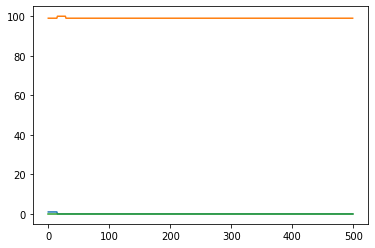

In [70]:
num = 100
people = makepeople(num, space=(10,10), mortality=0.01, social_distancing=0.7, virality=0.7, chanceofimmune=1)
performsim(500, people, num)

As you can see if everyone has natural immunity no one will get the virus

But this is very unrealistic so lets tone it down a bit

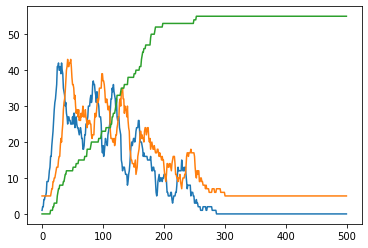

In [71]:
num = 100
people = makepeople(num, space=(10,10), mortality=0.01, social_distancing=0.7, virality=0.7, chanceofimmune=0.05)
performsim(500, people, num)

Now lets compare it to when there is no natural immunity

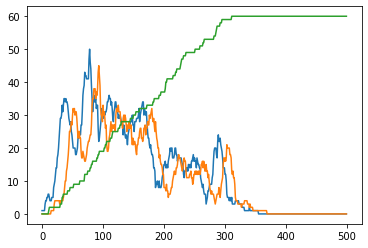

In [72]:
num = 100
people = makepeople(num, space=(10,10), mortality=0.01, social_distancing=0.7, virality=0.7, chanceofimmune=0.)
performsim(500, people, num)

Now you can see that the deaths are much more

# Hospitals

Normally there will be hospitals, which can help people from dying

If a person is in "critical conditions" if they are 2 "spaces" between them and a hospital they will spend the rest of there recovery in the hospital in which they will have a reduced chance of dying

In [73]:
def makehospitals(hospitalnum=1, space=(10,10)):
    hospital = []
    if hospitalnum != 0:
        x = random.randint(0, space[0])
        y = random.randint(0, space[1])
        hospital.append((x, y))
    for i in range(hospitalnum-1):
        run = True
        while run == True:
            thin = False
            x = random.randint(0, space[0])
            y = random.randint(0, space[1])
            for t in hospital:
                if x == t[0] and y == t[1]:
                    thin = True
            if thin == False:
                run = False
        hospital.append((x, y))
    return hospital

In [162]:
hospitals = makehospitals(10)
print(hospitals)

[(4, 9), (7, 1), (4, 6), (3, 1), (9, 3), (9, 8), (5, 6), (4, 5), (2, 8), (0, 7)]


Now that we've the hospitals set lets use them

In [74]:
def makepeople(amount=1, social_distancing=0, mortality=0, virality=1, immunitylast=15, length_of_infection=0, time_of_recover=15, space=(100,100), chanceofimmune=0.01, mortalityinhos=0.001):
    global person
    people = []
    num = random.randint(0,amount-1)
    for i in range(amount):
        if i == num:
            per = person(social_distancing, mortality, virality, immunitylast, length_of_infection, isinfected=True, time_of_recover=time_of_recover, space=space)
        else:
            per = person(social_distancing, mortality, virality, immunitylast, length_of_infection, time_of_recover=time_of_recover, space=space, isinfected=False, chanceofimmune=chanceofimmune)
        people.append(per)
    return people

def performsim(reps, people, numnum, hospitals):
    totalinfected = []
    totalimmunity = []
    totaldead = []
    hospitilized = []
    num = 0
    for t in range(reps):
        currentdata = []
        for i in people:
            currentdata.append(i.returndata()[7:9])
        a = 0
        for m in currentdata:
            for c in range(len(currentdata)):
                if int(currentdata[a][0]) == int(currentdata[c][0]) and a != c and int(currentdata[a][1]) == int(currentdata[c][1]):
                    if (people[a].returndata()[5] == True or people[c].returndata()[5] == True) and people[a].returndata()[5] != people[c].returndata()[5]:
                        if people[a].returndata()[5] == False:
                            people[a].infection()
                        else:
                            people[c].infection()
            a += 1
        infected = 0
        immune = 0
        hospitilise = 0
        numnum = 0
        for i in people:
            i.recovery()
            i.immunitykept()
            isdead = i.dying(hospitals)
            if isdead == True:
                people.pop(numnum)
                numnum -= 1
                num += 1
            if i.returndata()[5] == True:
                infected += 1
            if i.returndata()[9] == True:
                immune += 1
            if i.returndata()[10] == True:
                hospitilise += 1
            i.movement()
            numnum += 1
        totaldead.append(num)
        totalinfected.append(infected)
        totalimmunity.append(immune)
        hospitilized.append(hospitilise)
    plt.plot(totalinfected)
    plt.plot(totalimmunity)
    plt.plot(totaldead)
    plt.plot(hospitilized)

class person:
    def __init__(self, social_distancing=0, mortality=1, virality=1, immunitylast=15, length_of_infection=0, isinfected=False, time_of_recover=15, space=(100,100), chanceofimmune=0.05, mortalityinhos=0.001):
        self.social_distancing = social_distancing
        self.morality = mortality
        self.virality = virality
        self.immunitylast = immunitylast
        self.length_of_infection = length_of_infection
        self.x = random.randint(0, space[0])
        self.y = random.randint(0, space[1])
        self.isinfected = isinfected
        self.time_of_recover = time_of_recover
        self.timeofimmunity = 0
        self.space = space
        self.hasimmunity = False
        self.mortalityinhos = mortalityinhos
        self.inhospital = False
        if chanceofimmune >= random.random():
            self.hasimmunity = True
            self.isallredimmune = True
        else:
            self.isallredimmune = False
        self.hasbeeninfected = False
        
    def returndata(self):
        return (self.social_distancing, self.morality, self.virality, self.immunitylast, self.length_of_infection, self.isinfected, self.time_of_recover, self.x, self.y, self.hasimmunity, self.inhospital)
    
    def movement(self):
        if self.inhospital == False:
            move = random.random() * 2
            total_movement = 2
            if self.social_distancing != 0:
                minusmove = move / 2
                move -= self.social_distancing * minusmove * 2
                if move < 0:
                    move = 0
                total_movement -= self.social_distancing * 2
            if random.randint(0,1) == 1:
                self.x += move
            else:
                self.x -= move
            if random.randint(0,1) == 1:
                self.y += total_movement - move
            else:
                self.y -= total_movement - move
            if self.y < 0:
                self.y = self.y * -1
            elif self.y > self.space[1]:
                self.y -= self.y - self.space[1]
            if self.x < 0:
                self.x = self.x * -1
            elif self.x > self.space[0]:
                self.x -= self.x - self.space[0]
            
    def infection(self):
        if random.random() < self.virality and self.hasimmunity == False and self.isallredimmune == False:
            self.isinfected = True
            
    def recovery(self):
        if self.isinfected == True:
            if self.time_of_recover == self.length_of_infection:
                self.isinfected = False
                self.hasimmunity = True
                self.inhospital = False
                self.hasbeeninfected = True
                self.length_of_infection = 0
            else:
                self.length_of_infection += 1
                
    def immunitykept(self):
        if self.hasimmunity == True and self.isallredimmune == False:
            self.timeofimmunity += 1
            if self.timeofimmunity == self.immunitylast:
                self.hasimmunity = False
                self.timeofimmunity = 0
                
    def dying(self, hospitals):
        dead = False
        if self.isinfected == True:
            if random.random() <= self.morality and self.inhospital == False:
                for i in hospitals:
                    dis = 0
                    if i[0] > self.x:
                        dis += i[0] - self.x
                    else:
                        dis += self.x - i[0]
                    if i[1] > self.y:
                        dis += i[1] - self.y
                    else:
                        dis += self.y - i[1]
                    if int(dis) <= 2:
                        self.inhospital = True
                        self.x = i[0]
                        self.y = i[1]
                        if self.inhospital == True and random.random() <= self.mortalityinhos:
                            dead = True
                    else:
                        dead = True
            elif self.inhospital == True and random.random() <= self.mortalityinhos:
                dead = True
        return dead


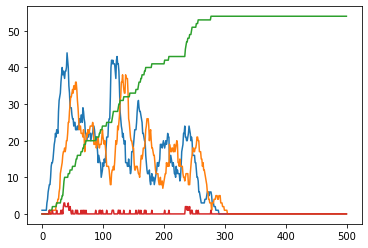

In [75]:
hospitals = makehospitals(20, space=(10,10))
num = 100
people = makepeople(num, space=(10,10), mortality=0.01, social_distancing=0.7, virality=0.7, chanceofimmune=0., mortalityinhos=0.0001)
performsim(500, people, num, hospitals)

As you can see hospital's aren't that effective at stopping people from dying due to hospitals not being in all space

So lets add another precautions

# Testing, symptoms and self-isolation

In the real world people wont know their infected until they start showing symptoms or get a test

So lets start with testing

We'll change it so at the start people will have houses at the start

Which will also require their houses to be in seperate places so no-one can have houses in the same places

In [76]:
def makepeople(amount=1, social_distancing=0, mortality=0, virality=1, immunitylast=15, length_of_infection=0, time_of_recover=15, space=(100,100), chanceofimmune=0.01, mortalityinhos=0.001):
    global person
    people = []
    houses = []
    if amount != 0:
        x = random.randint(0, space[0])
        y = random.randint(0, space[1])
        houses.append((x, y))
    for i in range(amount-1):
        run = True
        while run == True:
            thin = False
            x = random.randint(0, space[0])
            y = random.randint(0, space[1])
            for t in houses:
                if x == t[0] and y == t[1]:
                    thin = True
            if thin == False:
                run = False
        houses.append((x, y))
    num = random.randint(0,amount-1)
    for i in range(amount):
        if i == num:
            per = person(social_distancing, mortality, virality, immunitylast, length_of_infection, isinfected=True, time_of_recover=time_of_recover, space=space, house=houses[i])
        else:
            per = person(social_distancing, mortality, virality, immunitylast, length_of_infection, time_of_recover=time_of_recover, space=space, isinfected=False, chanceofimmune=chanceofimmune, house=houses[i])
        people.append(per)
    return people

Now lets implement testing

In [77]:
class person:
    def __init__(self, social_distancing=0, mortality=1, virality=1, immunitylast=15, length_of_infection=0, isinfected=False, time_of_recover=15, space=(100,100), chanceofimmune=0.05, mortalityinhos=0.001, house=(1, 1)):
        self.social_distancing = social_distancing
        self.morality = mortality
        self.virality = virality
        self.house = house
        self.immunitylast = immunitylast
        self.length_of_infection = length_of_infection
        self.x = random.randint(0, space[0])
        self.y = random.randint(0, space[1])
        self.isinfected = isinfected
        self.time_of_recover = time_of_recover
        self.timeofimmunity = 0
        self.space = space
        self.hasimmunity = False
        self.mortalityinhos = mortalityinhos
        self.inhospital = False
        if chanceofimmune >= random.random():
            self.hasimmunity = True
            self.isallredimmune = True
        else:
            self.isallredimmune = False
        self.selfisolating = False
        self.hasbeeninfected = False
        
    def returndata(self):
        return (self.social_distancing, self.morality, self.virality, self.immunitylast, self.length_of_infection, self.isinfected, self.time_of_recover, self.x, self.y, self.hasimmunity, self.inhospital)
    
    def movement(self):
        if self.inhospital == False and self.selfisolating == False:
            move = random.random() * 2
            total_movement = 2
            if self.social_distancing != 0:
                minusmove = move / 2
                move -= self.social_distancing * minusmove * 2
                if move < 0:
                    move = 0
                total_movement -= self.social_distancing * 2
            if random.randint(0,1) == 1:
                self.x += move
            else:
                self.x -= move
            if random.randint(0,1) == 1:
                self.y += total_movement - move
            else:
                self.y -= total_movement - move
            if self.y < 0:
                self.y = self.y * -1
            elif self.y > self.space[1]:
                self.y -= self.y - self.space[1]
            if self.x < 0:
                self.x = self.x * -1
            elif self.x > self.space[0]:
                self.x -= self.x - self.space[0]
            
    def infection(self):
        if random.random() < self.virality and self.hasimmunity == False and self.isallredimmune == False:
            self.isinfected = True
            
    def recovery(self):
        if self.isinfected == True:
            if self.time_of_recover == self.length_of_infection:
                self.isinfected = False
                self.hasimmunity = True
                self.inhospital = False
                self.hasbeeninfected = True
                self.length_of_infection = 0
            else:
                self.length_of_infection += 1
                
    def immunitykept(self):
        if self.hasimmunity == True and self.isallredimmune == False:
            self.timeofimmunity += 1
            if self.timeofimmunity == self.immunitylast:
                self.hasimmunity = False
                self.timeofimmunity = 0
                
    def dying(self, hospitals):
        dead = False
        if self.isinfected == True:
            if random.random() <= self.morality and self.inhospital == False:
                for i in hospitals:
                    dis = 0
                    if i[0] > self.x:
                        dis += i[0] - self.x
                    else:
                        dis += self.x - i[0]
                    if i[1] > self.y:
                        dis += i[1] - self.y
                    else:
                        dis += self.y - i[1]
                    if int(dis) <= 2:
                        self.inhospital = True
                        self.x = i[0]
                        self.y = i[1]
                        if self.inhospital == True and random.random() <= self.mortalityinhos:
                            dead = True
                    else:
                        dead = True
            elif self.inhospital == True and random.random() <= self.mortalityinhos:
                dead = True
        return dead
    
    def testing(self):
        if self.isinfected == True:
            self.x = self.house[0]
            self.y = self.house[1]
            self.selfisolating = True
        elif self.isinfected == False and self.selfisolating == True:
            self.selfisolating = False
        return self.house, self.isinfected

def performsim(reps, people, numnum, hospitals, testing=10):
    totalinfected = []
    totalimmunity = []
    totaldead = []
    hospitilized = []
    testedinfected = []
    num = 0
    for t in range(reps):
        currentdata = []
        for i in people:
            currentdata.append(i.returndata()[7:9])
        a = 0
        for m in currentdata:
            for c in range(len(currentdata)):
                if int(currentdata[a][0]) == int(currentdata[c][0]) and a != c and int(currentdata[a][1]) == int(currentdata[c][1]):
                    if (people[a].returndata()[5] == True or people[c].returndata()[5] == True) and people[a].returndata()[5] != people[c].returndata()[5]:
                        if people[a].returndata()[5] == False:
                            people[a].infection()
                        else:
                            people[c].infection()
            a += 1
        infected = 0
        immune = 0
        hospitilise = 0
        numnum = 0
        if t % testing == 0:
            tested = 0
        for i in people:
            i.recovery()
            i.immunitykept()
            if t % testing == 0:
                house, isinfected = i.testing()
                if isinfected == True:
                    tested += 1
            isdead = i.dying(hospitals)
            if isdead == True:
                people.pop(numnum)
                numnum -= 1
                num += 1
            if i.returndata()[5] == True:
                infected += 1
            if i.returndata()[9] == True:
                immune += 1
            if i.returndata()[10] == True:
                hospitilise += 1
            i.movement()
            numnum += 1
        testedinfected.append(tested)
        totaldead.append(num)
        totalinfected.append(infected)
        totalimmunity.append(immune)
        hospitilized.append(hospitilise)
    plt.plot(totalinfected)
    plt.plot(totalimmunity)
    plt.plot(totaldead)
    plt.plot(hospitilized)
    plt.plot(testedinfected)

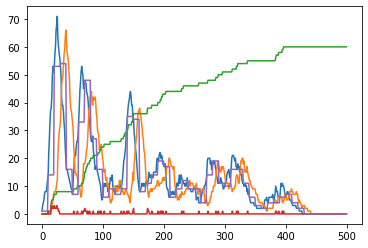

In [78]:
hospitals = makehospitals(20, space=(10,10))
num = 100
people = makepeople(num, space=(10,10), mortality=0.01, social_distancing=0.7, virality=0.7, chanceofimmune=0., mortalityinhos=0.0001)
performsim(500, people, num, hospitals)

Lets make the testing happen with more time between each test

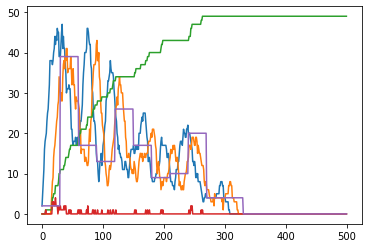

In [79]:
hospitals = makehospitals(20, space=(10,10))
num = 100
people = makepeople(num, space=(10,10), mortality=0.01, social_distancing=0.7, virality=0.7, chanceofimmune=0., mortalityinhos=0.0001)
performsim(500, people, num, hospitals, 30)

Now lets make sure people dont come into peoples house when self-isolating

We'll make them just not move if they are about to move into an self-isolating square

In [80]:
def performsim(reps, people, numnum, hospitals, testing=10):
    totalinfected = []
    totalimmunity = []
    totaldead = []
    hospitilized = []
    testedinfected = []
    num = 0
    for t in range(reps):
        currentdata = []
        for i in people:
            currentdata.append(i.returndata()[7:9])
        a = 0
        for m in currentdata:
            for c in range(len(currentdata)):
                if int(currentdata[a][0]) == int(currentdata[c][0]) and a != c and int(currentdata[a][1]) == int(currentdata[c][1]):
                    if (people[a].returndata()[5] == True or people[c].returndata()[5] == True) and people[a].returndata()[5] != people[c].returndata()[5]:
                        if people[a].returndata()[5] == False:
                            people[a].infection()
                        else:
                            people[c].infection()
            a += 1
        infected = 0
        immune = 0
        hospitilise = 0
        numnum = 0
        if t % testing == 0:
            usedplace = []
            tested = 0
        for i in people:
            i.recovery()
            i.immunitykept()
            if t % testing == 0:
                house, isinfected = i.testing()
                if isinfected == True:
                    tested += 1
                    usedplace.append(house)
            isdead = i.dying(hospitals)
            if isdead == True:
                people.pop(numnum)
                numnum -= 1
                num += 1
            if i.returndata()[5] == True:
                infected += 1
            if i.returndata()[9] == True:
                immune += 1
            if i.returndata()[10] == True:
                hospitilise += 1
            numnum += 1
        for i in people:
            i.movement(usedplace)
        testedinfected.append(tested)
        totaldead.append(num)
        totalinfected.append(infected)
        totalimmunity.append(immune)
        hospitilized.append(hospitilise)
    plt.plot(totalinfected)
    plt.plot(totalimmunity)
    plt.plot(totaldead)
    plt.plot(hospitilized)
    plt.plot(testedinfected)

class person:
    def __init__(self, social_distancing=0, mortality=1, virality=1, immunitylast=15, length_of_infection=0, isinfected=False, time_of_recover=15, space=(100,100), chanceofimmune=0.05, mortalityinhos=0.001, house=(1, 1)):
        self.social_distancing = social_distancing
        self.morality = mortality
        self.virality = virality
        self.house = house
        self.immunitylast = immunitylast
        self.length_of_infection = length_of_infection
        self.x = random.randint(0, space[0])
        self.y = random.randint(0, space[1])
        self.isinfected = isinfected
        self.time_of_recover = time_of_recover
        self.timeofimmunity = 0
        self.space = space
        self.hasimmunity = False
        self.mortalityinhos = mortalityinhos
        self.inhospital = False
        if chanceofimmune >= random.random():
            self.hasimmunity = True
            self.isallredimmune = True
        else:
            self.isallredimmune = False
        self.selfisolating = False
        self.hasbeeninfected = False
        
    def returndata(self):
        return (self.social_distancing, self.morality, self.virality, self.immunitylast, self.length_of_infection, self.isinfected, self.time_of_recover, self.x, self.y, self.hasimmunity, self.inhospital)
    
    def movement(self, usedhouse):
        if self.inhospital == False and self.selfisolating == False:
            move = random.random() * 2
            total_movement = 2
            if self.social_distancing != 0:
                minusmove = move / 2
                move -= self.social_distancing * minusmove * 2
                if move < 0:
                    move = 0
                total_movement -= self.social_distancing * 2
            if random.randint(0,1) == 1:
                self.x += move
                a = False
            else:
                self.x -= move
                a = True
            if random.randint(0,1) == 1:
                self.y += total_movement - move
                b = False
            else:
                self.y -= total_movement - move
                b = True
            for i in usedhouse:
                if int(self.x) == i[0] and (self.y) == i[1]:
                    if a == False:
                        self.x -= move
                    else:
                        self.x += move
                    if b == False:
                        self.y -= total_movement - move
                    else:
                        self.y += total_movement - move
            if self.y < 0:
                self.y = self.y * -1
            elif self.y > self.space[1]:
                self.y -= self.y - self.space[1]
            if self.x < 0:
                self.x = self.x * -1
            elif self.x > self.space[0]:
                self.x -= self.x - self.space[0]
            
    def infection(self):
        if random.random() < self.virality and self.hasimmunity == False and self.isallredimmune == False:
            self.isinfected = True
            
    def recovery(self):
        if self.isinfected == True:
            if self.time_of_recover == self.length_of_infection:
                self.isinfected = False
                self.hasimmunity = True
                self.inhospital = False
                self.hasbeeninfected = True
                self.length_of_infection = 0
            else:
                self.length_of_infection += 1
                
    def immunitykept(self):
        if self.hasimmunity == True and self.isallredimmune == False:
            self.timeofimmunity += 1
            if self.timeofimmunity == self.immunitylast:
                self.hasimmunity = False
                self.timeofimmunity = 0
                
    def dying(self, hospitals):
        dead = False
        if self.isinfected == True:
            if random.random() <= self.morality and self.inhospital == False:
                for i in hospitals:
                    dis = 0
                    if i[0] > self.x:
                        dis += i[0] - self.x
                    else:
                        dis += self.x - i[0]
                    if i[1] > self.y:
                        dis += i[1] - self.y
                    else:
                        dis += self.y - i[1]
                    if int(dis) <= 2:
                        self.inhospital = True
                        self.x = i[0]
                        self.y = i[1]
                        if self.inhospital == True and random.random() <= self.mortalityinhos:
                            dead = True
                    else:
                        dead = True
            elif self.inhospital == True and random.random() <= self.mortalityinhos:
                dead = True
        return dead
    
    def testing(self):
        if self.isinfected == True:
            self.x = self.house[0]
            self.y = self.house[1]
            self.selfisolating = True
        elif self.isinfected == False and self.selfisolating == True:
            self.selfisolating = False
        return self.house, self.isinfected

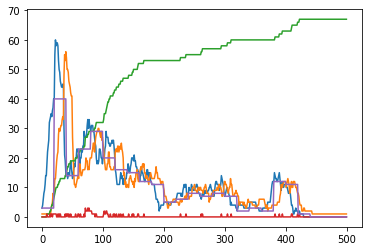

In [81]:
hospitals = makehospitals(20, space=(10,10))
num = 100
people = makepeople(num, space=(10,10), mortality=0.01, social_distancing=0.7, virality=0.7, chanceofimmune=0., mortalityinhos=0.0001)
performsim(500, people, num, hospitals, 20)

Now normaly people won't die if they don't have sypmtoms

So lets quickly make that

In [88]:
class person:
    def __init__(self, social_distancing=0, mortality=1, virality=1, immunitylast=15, length_of_infection=0, isinfected=False, time_of_recover=15, space=(100,100), chanceofimmune=0.05, mortalityinhos=0.001, house=(1, 1), timetillsymptom=9):
        self.timetillsymptom = timetillsymptom
        self.social_distancing = social_distancing
        self.morality = mortality
        self.virality = virality
        self.house = house
        self.immunitylast = immunitylast
        self.length_of_infection = length_of_infection
        self.x = random.randint(0, space[0])
        self.y = random.randint(0, space[1])
        self.isinfected = isinfected
        self.time_of_recover = time_of_recover
        self.timeofimmunity = 0
        self.space = space
        self.hasimmunity = False
        self.mortalityinhos = mortalityinhos
        self.inhospital = False
        self.beentested = False
        self.showingsymptoms = False
        if chanceofimmune >= random.random():
            self.hasimmunity = True
            self.isallredimmune = True
        else:
            self.isallredimmune = False
        self.selfisolating = False
        self.hasbeeninfected = False
        
    def returndata(self):
        return (self.social_distancing, self.morality, self.virality, self.immunitylast, self.length_of_infection, self.isinfected, self.time_of_recover, self.x, self.y, self.hasimmunity, self.inhospital)
    
    def movement(self, usedhouse):
        if self.inhospital == False and self.selfisolating == False:
            move = random.random() * 2
            total_movement = 2
            if self.social_distancing != 0:
                minusmove = move / 2
                move -= self.social_distancing * minusmove * 2
                if move < 0:
                    move = 0
                total_movement -= self.social_distancing * 2
            if random.randint(0,1) == 1:
                self.x += move
                a = False
            else:
                self.x -= move
                a = True
            if random.randint(0,1) == 1:
                self.y += total_movement - move
                b = False
            else:
                self.y -= total_movement - move
                b = True
            for i in usedhouse:
                if int(self.x) == i[0] and (self.y) == i[1]:
                    if a == False:
                        self.x -= move
                    else:
                        self.x += move
                    if b == False:
                        self.y -= total_movement - move
                    else:
                        self.y += total_movement - move
            if self.y < 0:
                self.y = self.y * -1
            elif self.y > self.space[1]:
                self.y -= self.y - self.space[1]
            if self.x < 0:
                self.x = self.x * -1
            elif self.x > self.space[0]:
                self.x -= self.x - self.space[0]
            
    def infection(self):
        if random.random() < self.virality and self.hasimmunity == False and self.isallredimmune == False:
            self.isinfected = True
            
    def recovery(self):
        if self.isinfected == True:
            if self.time_of_recover == self.length_of_infection:
                self.isinfected = False
                self.hasimmunity = True
                self.inhospital = False
                self.showingsymptoms = False
                self.hasbeeninfected = True
                self.length_of_infection = 0
            else:
                self.length_of_infection += 1
                
    def immunitykept(self):
        if self.hasimmunity == True and self.isallredimmune == False:
            self.timeofimmunity += 1
            if self.timeofimmunity == self.immunitylast:
                self.hasimmunity = False
                self.timeofimmunity = 0
                
    def dying(self, hospitals):
        dead = False
        if self.isinfected == True and self.showingsymptoms == True:
            if random.random() <= self.morality and self.inhospital == False:
                for i in hospitals:
                    dis = 0
                    if i[0] > self.x:
                        dis += i[0] - self.x
                    else:
                        dis += self.x - i[0]
                    if i[1] > self.y:
                        dis += i[1] - self.y
                    else:
                        dis += self.y - i[1]
                    if int(dis) <= 2:
                        self.inhospital = True
                        self.x = i[0]
                        self.y = i[1]
                        if self.inhospital == True and random.random() <= self.mortalityinhos:
                            dead = True
                    else:
                        dead = True
            elif self.inhospital == True and random.random() <= self.mortalityinhos:
                dead = True
        return dead
    
    def testing(self, symptomtest=False):
        if self.isinfected == True and symptomtest == False:
            self.x = self.house[0]
            self.y = self.house[1]
            self.beentested = True
            self.selfisolating = True
        elif self.beentested == True and symptomtest == True and self.isinfected == True:
            self.x = self.house[0]
            self.y = self.house[1]
            self.beentested = True
            self.selfisolating = True
        elif self.isinfected == False and self.selfisolating == True:
            self.selfisolating = False
        return self.house, self.isinfected
    
    def showsymptoms(self):
        if self.timetillsymptom <= self.length_of_infection and self.isinfected:
            self.showingsymptoms = True
            return True
        return False

def makepeople(amount=1, social_distancing=0, mortality=0, virality=1, immunitylast=15, length_of_infection=0, time_of_recover=15, space=(100,100), chanceofimmune=0.01, mortalityinhos=0.001, timetillsymptom=9):
    global person
    people = []
    houses = []
    if amount != 0:
        x = random.randint(0, space[0])
        y = random.randint(0, space[1])
        houses.append((x, y))
    for i in range(amount-1):
        run = True
        while run == True:
            thin = False
            x = random.randint(0, space[0])
            y = random.randint(0, space[1])
            for t in houses:
                if x == t[0] and y == t[1]:
                    thin = True
            if thin == False:
                run = False
        houses.append((x, y))
    num = random.randint(0,amount-1)
    for i in range(amount):
        if i == num:
            per = person(social_distancing, mortality, virality, immunitylast, length_of_infection, isinfected=True, time_of_recover=time_of_recover, space=space, house=houses[i], timetillsymptom=9)
        else:
            per = person(social_distancing, mortality, virality, immunitylast, length_of_infection, time_of_recover=time_of_recover, space=space, isinfected=False, chanceofimmune=chanceofimmune, house=houses[i], timetillsymptom=9)
        people.append(per)
    return people

def performsim(reps, people, numnum, hospitals, testing=10):
    totalinfected = []
    totalimmunity = []
    totaldead = []
    hospitilized = []
    testedinfected = []
    totalsymptoms = []
    num = 0
    for t in range(reps):
        currentdata = []
        for i in people:
            currentdata.append(i.returndata()[7:9])
        a = 0
        for m in currentdata:
            for c in range(len(currentdata)):
                if int(currentdata[a][0]) == int(currentdata[c][0]) and a != c and int(currentdata[a][1]) == int(currentdata[c][1]):
                    if (people[a].returndata()[5] == True or people[c].returndata()[5] == True) and people[a].returndata()[5] != people[c].returndata()[5]:
                        if people[a].returndata()[5] == False:
                            people[a].infection()
                        else:
                            people[c].infection()
            a += 1
        infected = 0
        immune = 0
        hospitilise = 0
        numnum = 0
        symptom = 0
        if t % testing == 0:
            usedplace = []
            tested = 0
        for i in people:
            i.recovery()
            i.immunitykept()
            if t % testing == 0:
                house, isinfected = i.testing()
                if isinfected == True:
                    tested += 1
                    usedplace.append(house)
            symptoms = i.showsymptoms()
            if symptoms == True:
                symptom += 1
            isdead = i.dying(hospitals)
            if isdead == True:
                people.pop(numnum)
                numnum -= 1
                num += 1
            if i.returndata()[5] == True:
                infected += 1
            if i.returndata()[9] == True:
                immune += 1
            if i.returndata()[10] == True:
                hospitilise += 1
            numnum += 1
        for i in people:
            i.movement(usedplace)
        totalsymptoms.append(symptom)
        testedinfected.append(tested)
        totaldead.append(num)
        totalinfected.append(infected)
        totalimmunity.append(immune)
        hospitilized.append(hospitilise)
    plt.plot(totalinfected)
    plt.plot(totalimmunity)
    plt.plot(totaldead)
    plt.plot(hospitilized)
    plt.plot(testedinfected)
    plt.plot(totalsymptoms)

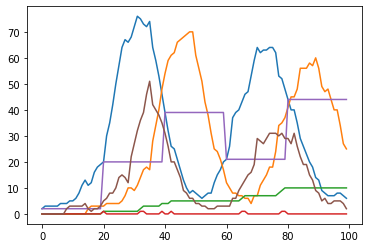

In [89]:
hospitals = makehospitals(20, space=(10,10))
num = 100
people = makepeople(num, space=(10,10), mortality=0.01, social_distancing=0.7, virality=0.7, chanceofimmune=0., mortalityinhos=0.0001)
performsim(100, people, num, hospitals, 20)

We'll also make it so that it if people show symptoms they will get tested

In [92]:
class person:
    def __init__(self, social_distancing=0, mortality=1, virality=1, immunitylast=15, length_of_infection=0, isinfected=False, time_of_recover=15, space=(100,100), chanceofimmune=0.05, mortalityinhos=0.001, house=(1, 1), timetillsymptom=9):
        self.timetillsymptom = timetillsymptom
        self.social_distancing = social_distancing
        self.morality = mortality
        self.virality = virality
        self.house = house
        self.immunitylast = immunitylast
        self.length_of_infection = length_of_infection
        self.x = random.randint(0, space[0])
        self.y = random.randint(0, space[1])
        self.isinfected = isinfected
        self.time_of_recover = time_of_recover
        self.timeofimmunity = 0
        self.space = space
        self.hasimmunity = False
        self.mortalityinhos = mortalityinhos
        self.inhospital = False
        self.beentested = False
        self.showingsymptoms = False
        if chanceofimmune >= random.random():
            self.hasimmunity = True
            self.isallredimmune = True
        else:
            self.isallredimmune = False
        self.selfisolating = False
        self.hasbeeninfected = False
        
    def returndata(self):
        return (self.social_distancing, self.morality, self.virality, self.immunitylast, self.length_of_infection, self.isinfected, self.time_of_recover, self.x, self.y, self.hasimmunity, self.inhospital)
    
    def movement(self, usedhouse):
        if self.inhospital == False and self.selfisolating == False:
            move = random.random() * 2
            total_movement = 2
            if self.social_distancing != 0:
                minusmove = move / 2
                move -= self.social_distancing * minusmove * 2
                if move < 0:
                    move = 0
                total_movement -= self.social_distancing * 2
            if random.randint(0,1) == 1:
                self.x += move
                a = False
            else:
                self.x -= move
                a = True
            if random.randint(0,1) == 1:
                self.y += total_movement - move
                b = False
            else:
                self.y -= total_movement - move
                b = True
            for i in usedhouse:
                if int(self.x) == i[0] and (self.y) == i[1]:
                    if a == False:
                        self.x -= move
                    else:
                        self.x += move
                    if b == False:
                        self.y -= total_movement - move
                    else:
                        self.y += total_movement - move
            if self.y < 0:
                self.y = self.y * -1
            elif self.y > self.space[1]:
                self.y -= self.y - self.space[1]
            if self.x < 0:
                self.x = self.x * -1
            elif self.x > self.space[0]:
                self.x -= self.x - self.space[0]
            
    def infection(self):
        if random.random() < self.virality and self.hasimmunity == False and self.isallredimmune == False:
            self.isinfected = True
            
    def recovery(self):
        if self.isinfected == True:
            if self.time_of_recover == self.length_of_infection:
                self.isinfected = False
                self.hasimmunity = True
                self.inhospital = False
                self.showingsymptoms = False
                self.hasbeeninfected = True
                self.length_of_infection = 0
            else:
                self.length_of_infection += 1
                
    def immunitykept(self):
        if self.hasimmunity == True and self.isallredimmune == False:
            self.timeofimmunity += 1
            if self.timeofimmunity == self.immunitylast:
                self.hasimmunity = False
                self.timeofimmunity = 0
                
    def dying(self, hospitals):
        dead = False
        if self.isinfected == True and self.showingsymptoms == True:
            if random.random() <= self.morality and self.inhospital == False:
                for i in hospitals:
                    dis = 0
                    if i[0] > self.x:
                        dis += i[0] - self.x
                    else:
                        dis += self.x - i[0]
                    if i[1] > self.y:
                        dis += i[1] - self.y
                    else:
                        dis += self.y - i[1]
                    if int(dis) <= 2:
                        self.inhospital = True
                        self.x = i[0]
                        self.y = i[1]
                        if self.inhospital == True and random.random() <= self.mortalityinhos:
                            dead = True
                    else:
                        dead = True
            elif self.inhospital == True and random.random() <= self.mortalityinhos:
                dead = True
        return dead
    
    def testing(self, symptomtest=False):
        ting = False
        if self.isinfected == True and symptomtest == False:
            self.x = self.house[0]
            self.y = self.house[1]
            self.beentested = True
            self.selfisolating = True
        elif self.beentested == False and symptomtest == True and self.isinfected == True:
            self.x = self.house[0]
            self.y = self.house[1]
            self.beentested = True
            self.selfisolating = True
            ting = True
        elif self.isinfected == False and self.selfisolating == True:
            self.beentested = False
            self.selfisolating = False
        return self.house, self.isinfected, ting
    
    def showsymptoms(self):
        if self.timetillsymptom <= self.length_of_infection and self.isinfected == True:
            self.showingsymptoms = True
            return True
        return False

def performsim(reps, people, numnum, hospitals, testing=10):
    totalinfected = []
    totalimmunity = []
    totaldead = []
    hospitilized = []
    testedinfected = []
    totalsymptoms = []
    num = 0
    for t in range(reps):
        currentdata = []
        for i in people:
            currentdata.append(i.returndata()[7:9])
        a = 0
        for m in currentdata:
            for c in range(len(currentdata)):
                if int(currentdata[a][0]) == int(currentdata[c][0]) and a != c and int(currentdata[a][1]) == int(currentdata[c][1]):
                    if (people[a].returndata()[5] == True or people[c].returndata()[5] == True) and people[a].returndata()[5] != people[c].returndata()[5]:
                        if people[a].returndata()[5] == False:
                            people[a].infection()
                        else:
                            people[c].infection()
            a += 1
        infected = 0
        immune = 0
        hospitilise = 0
        numnum = 0
        symptom = 0
        if t % testing == 0:
            usedplace = []
            tested = 0
        for i in people:
            i.recovery()
            i.immunitykept()
            if t % testing == 0:
                house, isinfected, _ = i.testing()
                if isinfected == True:
                    tested += 1
                    usedplace.append(house)
            symptoms = i.showsymptoms()
            if symptoms == True:
                symptom += 1
                house, _, innfected = i.testing(symptomtest=True)
                if innfected == True:
                    tested += 1
                    usedplace.append(house)
            isdead = i.dying(hospitals)
            if isdead == True:
                people.pop(numnum)
                numnum -= 1 
                num += 1
            if i.returndata()[5] == True:
                infected += 1
            if i.returndata()[9] == True:
                immune += 1
            if i.returndata()[10] == True:
                hospitilise += 1
            numnum += 1
        for i in people:
            i.movement(usedplace)
        totalsymptoms.append(symptom)
        testedinfected.append(tested)
        totaldead.append(num)
        totalinfected.append(infected)
        totalimmunity.append(immune)
        hospitilized.append(hospitilise)
    plt.plot(totalinfected)
    plt.plot(totalimmunity)
    plt.plot(totaldead)
    plt.plot(hospitilized)
    plt.plot(testedinfected)
    plt.plot(totalsymptoms)

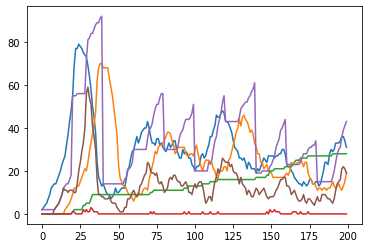

In [94]:
hospitals = makehospitals(20, space=(10,10))
num = 100
people = makepeople(num, space=(10,10), mortality=0.01, social_distancing=0.7, virality=0.7, chanceofimmune=0., mortalityinhos=0.0001)
performsim(200, people, num, hospitals, 20)

# Prior health issues

Now sometimes people will have prior health problems

This will increase the mortality of the disease

In [100]:
class person:
    def __init__(self, social_distancing=0, mortality=1, virality=1, immunitylast=15, length_of_infection=0, isinfected=False, time_of_recover=15, space=(100,100), chanceofimmune=0.05, mortalityinhos=0.001, house=(1, 1), timetillsymptom=9, prior_healthissues=0.02):
        self.timetillsymptom = timetillsymptom
        self.social_distancing = social_distancing
        self.morality = mortality
        self.virality = virality
        self.house = house
        self.immunitylast = immunitylast
        self.length_of_infection = length_of_infection
        self.x = random.randint(0, space[0])
        self.y = random.randint(0, space[1])
        self.isinfected = isinfected
        self.time_of_recover = time_of_recover
        self.timeofimmunity = 0
        self.space = space
        self.hasimmunity = False
        self.mortalityinhos = mortalityinhos
        self.inhospital = False
        self.beentested = False
        self.showingsymptoms = False
        if random.random() <= prior_healthissues:
            self.healthissue = True
        else:
            self.healthissue = False
        if chanceofimmune >= random.random():
            self.hasimmunity = True
            self.isallredimmune = True
        else:
            self.isallredimmune = False
        self.selfisolating = False
        self.hasbeeninfected = False
        
    def returndata(self):
        return (self.social_distancing, self.morality, self.virality, self.immunitylast, self.length_of_infection, self.isinfected, self.time_of_recover, self.x, self.y, self.hasimmunity, self.inhospital, self.healthissue)
    
    def movement(self, usedhouse):
        if self.inhospital == False and self.selfisolating == False:
            move = random.random() * 2
            total_movement = 2
            if self.social_distancing != 0:
                minusmove = move / 2
                move -= self.social_distancing * minusmove * 2
                if move < 0:
                    move = 0
                total_movement -= self.social_distancing * 2
            if random.randint(0,1) == 1:
                self.x += move
                a = False
            else:
                self.x -= move
                a = True
            if random.randint(0,1) == 1:
                self.y += total_movement - move
                b = False
            else:
                self.y -= total_movement - move
                b = True
            for i in usedhouse:
                if int(self.x) == i[0] and (self.y) == i[1]:
                    if a == False:
                        self.x -= move
                    else:
                        self.x += move
                    if b == False:
                        self.y -= total_movement - move
                    else:
                        self.y += total_movement - move
            if self.y < 0:
                self.y = self.y * -1
            elif self.y > self.space[1]:
                self.y -= self.y - self.space[1]
            if self.x < 0:
                self.x = self.x * -1
            elif self.x > self.space[0]:
                self.x -= self.x - self.space[0]
            
    def infection(self):
        if random.random() < self.virality and self.hasimmunity == False and self.isallredimmune == False:
            self.isinfected = True
            
    def recovery(self):
        if self.isinfected == True:
            if self.time_of_recover == self.length_of_infection:
                self.isinfected = False
                self.hasimmunity = True
                self.inhospital = False
                self.showingsymptoms = False
                self.hasbeeninfected = True
                self.length_of_infection = 0
            else:
                self.length_of_infection += 1
                
    def immunitykept(self):
        if self.hasimmunity == True and self.isallredimmune == False:
            self.timeofimmunity += 1
            if self.timeofimmunity == self.immunitylast:
                self.hasimmunity = False
                self.timeofimmunity = 0
                
    def dying(self, hospitals):
        dead = False
        if self.isinfected == True and self.showingsymptoms == True:
            if self.healthissue == True:
                addmort = 0.2
            else:
                addmort = 0
            if random.random() <= self.morality + addmort and self.inhospital == False:
                for i in hospitals:
                    dis = 0
                    if i[0] > self.x:
                        dis += i[0] - self.x
                    else:
                        dis += self.x - i[0]
                    if i[1] > self.y:
                        dis += i[1] - self.y
                    else:
                        dis += self.y - i[1]
                    if int(dis) <= 2:
                        self.inhospital = True
                        self.x = i[0]
                        self.y = i[1]
                        if self.inhospital == True and random.random() <= self.mortalityinhos:
                            dead = True
                    else:
                        dead = True
            elif self.inhospital == True and random.random() <= self.mortalityinhos:
                dead = True
        return dead
    
    def testing(self, symptomtest=False):
        ting = False
        if self.isinfected == True and symptomtest == False:
            self.x = self.house[0]
            self.y = self.house[1]
            self.beentested = True
            self.selfisolating = True
        elif self.beentested == False and symptomtest == True and self.isinfected == True:
            self.x = self.house[0]
            self.y = self.house[1]
            self.beentested = True
            self.selfisolating = True
            ting = True
        elif self.isinfected == False and self.selfisolating == True:
            self.beentested = False
            self.selfisolating = False
        return self.house, self.isinfected, ting
    
    def showsymptoms(self):
        if self.timetillsymptom <= self.length_of_infection and self.isinfected == True:
            self.showingsymptoms = True
            return True
        return False
    
def makepeople(amount=1, social_distancing=0, mortality=0, virality=1, immunitylast=15, length_of_infection=0, time_of_recover=15, space=(100,100), chanceofimmune=0.01, mortalityinhos=0.001, timetillsymptom=9, healthissues=0.02):
    global person
    people = []
    houses = []
    if amount != 0:
        x = random.randint(0, space[0])
        y = random.randint(0, space[1])
        houses.append((x, y))
    for i in range(amount-1):
        run = True
        while run == True:
            thin = False
            x = random.randint(0, space[0])
            y = random.randint(0, space[1])
            for t in houses:
                if x == t[0] and y == t[1]:
                    thin = True
            if thin == False:
                run = False
        houses.append((x, y))
    num = random.randint(0,amount-1)
    for i in range(amount):
        if i == num:
            per = person(social_distancing, mortality, virality, immunitylast, length_of_infection, isinfected=True, time_of_recover=time_of_recover, space=space, house=houses[i], timetillsymptom=9, prior_healthissues=healthissues)
        else:
            per = person(social_distancing, mortality, virality, immunitylast, length_of_infection, time_of_recover=time_of_recover, space=space, isinfected=False, chanceofimmune=chanceofimmune, house=houses[i], timetillsymptom=9, prior_healthissues=healthissues)
        people.append(per)
    return people

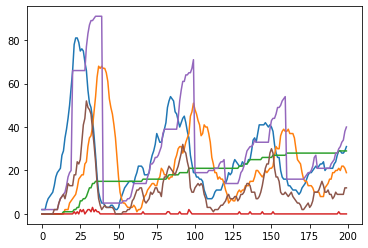

In [101]:
hospitals = makehospitals(20, space=(10,10))
num = 100
people = makepeople(num, space=(10,10), mortality=0.01, social_distancing=0.7, virality=0.7, chanceofimmune=0., mortalityinhos=0.0001)
performsim(200, people, num, hospitals, 20)

Now lets see how many people there are with health problems

In [102]:
def performsim(reps, people, numnum, hospitals, testing=10):
    totalinfected = []
    totalimmunity = []
    totaldead = []
    hospitilized = []
    testedinfected = []
    totalsymptoms = []
    totalhealthprob = []
    num = 0
    for t in range(reps):
        currentdata = []
        for i in people:
            currentdata.append(i.returndata()[7:9])
        a = 0
        for m in currentdata:
            for c in range(len(currentdata)):
                if int(currentdata[a][0]) == int(currentdata[c][0]) and a != c and int(currentdata[a][1]) == int(currentdata[c][1]):
                    if (people[a].returndata()[5] == True or people[c].returndata()[5] == True) and people[a].returndata()[5] != people[c].returndata()[5]:
                        if people[a].returndata()[5] == False:
                            people[a].infection()
                        else:
                            people[c].infection()
            a += 1
        infected = 0
        immune = 0
        hospitilise = 0
        numnum = 0
        symptom = 0
        healthprob = 0
        if t % testing == 0:
            usedplace = []
            tested = 0
        for i in people:
            i.recovery()
            i.immunitykept()
            if t % testing == 0:
                house, isinfected, _ = i.testing()
                if isinfected == True:
                    tested += 1
                    usedplace.append(house)
            symptoms = i.showsymptoms()
            if symptoms == True:
                symptom += 1
                house, _, innfected = i.testing(symptomtest=True)
                if innfected == True:
                    tested += 1
                    usedplace.append(house)
            isdead = i.dying(hospitals)
            if isdead == True:
                people.pop(numnum)
                numnum -= 1 
                num += 1
            if i.returndata()[5] == True:
                infected += 1
            if i.returndata()[9] == True:
                immune += 1
            if i.returndata()[10] == True:
                hospitilise += 1
            if i.returndata()[11] == True:
                healthprob += 1
            numnum += 1
        for i in people:
            i.movement(usedplace)
        totalhealthprob.append(healthprob)
        totalsymptoms.append(symptom)
        testedinfected.append(tested)
        totaldead.append(num)
        totalinfected.append(infected)
        totalimmunity.append(immune)
        hospitilized.append(hospitilise)
    plt.plot(totalinfected)
    plt.plot(totalimmunity)
    plt.plot(totaldead)
    plt.plot(hospitilized)
    plt.plot(testedinfected)
    plt.plot(totalsymptoms)
    plt.plot(totalhealthprob)

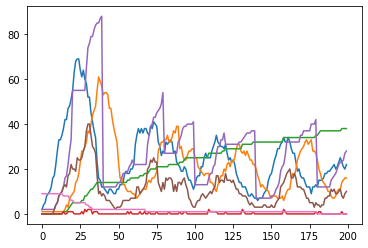

In [104]:
hospitals = makehospitals(20, space=(10,10))
num = 100
people = makepeople(num, space=(10,10), mortality=0.01, social_distancing=0.7, virality=0.7, chanceofimmune=0., mortalityinhos=0.0001, healthissues=0.1)
performsim(200, people, num, hospitals, 20)

Now that we've finished lets run this a few more times

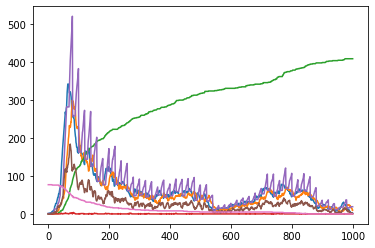

In [108]:
hospitals = makehospitals(50, space=(50,50))
num = 1000
people = makepeople(num, space=(50,50), mortality=0.01, social_distancing=0.7, virality=0.7, chanceofimmune=0., mortalityinhos=0.0001, healthissues=0.1)
performsim(1000, people, num, hospitals, 20)

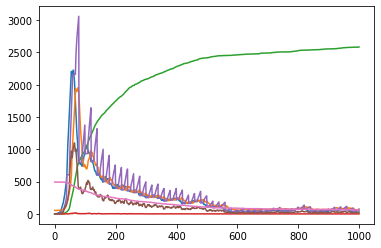

In [112]:
hospitals = makehospitals(100, space=(100,100))
num = 5000
people = makepeople(num, space=(100,100), mortality=0.01, social_distancing=0.7, virality=0.7, chanceofimmune=0.01, mortalityinhos=0.0001, healthissues=0.1)
performsim(1000, people, num, hospitals, 20)

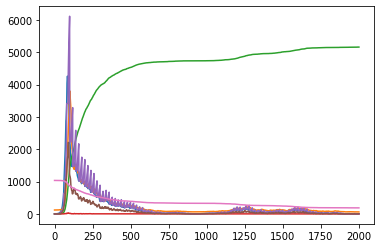

In [113]:
hospitals = makehospitals(200, space=(150,150))
num = 10000
people = makepeople(num, space=(150,150), mortality=0.01, social_distancing=0.7, virality=0.7, chanceofimmune=0.01, mortalityinhos=0.0001, healthissues=0.1)
performsim(2000, people, num, hospitals, 20)

# Full code, with comments

In [ ]:
import random
import matplotlib.pyplot as plt
class person:
    def __init__(self, social_distancing=0, mortality=1, virality=1, immunitylast=15, length_of_infection=0, isinfected=False, time_of_recover=15, space=(100,100), chanceofimmune=0.05, mortalityinhos=0.001, house=(1, 1), timetillsymptom=9, prior_healthissues=0.02):
        self.timetillsymptom = timetillsymptom # This is the time till the infected person show symptoms
        self.social_distancing = social_distancing # This reduces the amount people move
        self.morality = mortality # This increases the chance of people dying from the virus
        self.virality = virality # This increases the chance of people getting the virus from another infected person
        self.house = house # This is where the person will self isolate when infected
        self.immunitylast = immunitylast # This is how long the immunity of the person will keep immunity
        self.length_of_infection = length_of_infection # This is how long the person has had a virus
        self.x = random.randint(0, space[0]) # The person's x position
        self.y = random.randint(0, space[1]) # The person's y position
        self.isinfected = isinfected # This stores whether the person is infected or not
        self.time_of_recover = time_of_recover # This will determine how long the virus will last
        self.timeofimmunity = 0 # This stores how long the person has had immunity
        self.space = space # This stores the edges of the area
        self.hasimmunity = False # This stores whether the person has immunity
        self.mortalityinhos = mortalityinhos # This will determine the chance of dying in hospital 
        self.inhospital = False # This stores whether the person is in hospital
        self.beentested = False # This stores whether the person has been tested
        self.showingsymptoms = False # This stores whether the person is showing symptoms
        if random.random() <= prior_healthissues: # This determines whether the person has a health issue
            self.healthissue = True
        else:
            self.healthissue = False
        if chanceofimmune >= random.random(): # Determines whether the person has a natural immunity
            self.hasimmunity = True
            self.isallredimmune = True
        else:
            self.isallredimmune = False
        self.selfisolating = False # This stores whether the person is self isolating
        self.hasbeeninfected = False # This stores whether the person has been infected
        
    def returndata(self): # This returns data to be used
        return (self.social_distancing, self.morality, self.virality, self.immunitylast, self.length_of_infection, self.isinfected, self.time_of_recover, self.x, self.y, self.hasimmunity, self.inhospital, self.healthissue)
    
    def movement(self, usedhouse): # This determines where the person moves
        if self.inhospital == False and self.selfisolating == False: # This checks whether the person should move
            move = random.random() * 2 # This calculates the x movement
            total_movement = 2 # This stores the total movement
            if self.social_distancing != 0: # This calculates the movement if social_distancing is not 0
                minusmove = move / 2 # This calculates how much y movment the person has
                move -= self.social_distancing * minusmove * 2 # This calculates how much there should be taken away from the movement
                if move < 0: # This set movement to 0 if it is less than 0
                    move = 0
                total_movement -= self.social_distancing * 2 # This changes the total_movement depending on the social distancing
            if random.randint(0,1) == 1: # These next few lines randomly choose whether the person moving to a negitive or positive x/y
                self.x += move
                a = False
            else:
                self.x -= move
                a = True
            if random.randint(0,1) == 1:
                self.y += total_movement - move
                b = False
            else:
                self.y -= total_movement - move
                b = True
            for i in usedhouse: # This checks whether the person can move into the space
                if int(self.x) == i[0] and (self.y) == i[1]: # These next few lines move the person back their original place if they are in a person place who is self isolating
                    if a == False:
                        self.x -= move
                    else:
                        self.x += move
                    if b == False:
                        self.y -= total_movement - move
                    else:
                        self.y += total_movement - move
            if self.y < 0: # These next few lines stop the person from moving out the area
                self.y = self.y * -1
            elif self.y > self.space[1]:
                self.y -= self.y - self.space[1]
            if self.x < 0:
                self.x = self.x * -1
            elif self.x > self.space[0]:
                self.x -= self.x - self.space[0]
            
    def infection(self): # This sets the person to infected depending on certain variables
        if random.random() < self.virality and self.hasimmunity == False and self.isallredimmune == False: # This calculates whether the person should be infected, depending also on whether the person is allready immune
            self.isinfected = True
            
    def recovery(self): # This check whether people have recovered from the infection
        if self.isinfected == True: # This checks whether the person is infected
            if self.time_of_recover == self.length_of_infection: # This checks whether the person has had the infectection long enough to recover
                self.isinfected = False # The next few lines changes certain variables eg whether a person is infected, immune, ect
                self.hasimmunity = True
                self.inhospital = False
                self.showingsymptoms = False
                self.hasbeeninfected = True
                self.length_of_infection = 0
            else:
                self.length_of_infection += 1 # This adds a day to the amount of iteration the person has had the infection
                
    def immunitykept(self): # This checks whether the person does not have immunity
        if self.hasimmunity == True and self.isallredimmune == False: # This checks whether the person has immunity and whether the person has a natural immunity
            self.timeofimmunity += 1 # This adds time to the total time the person has had immunity
            if self.timeofimmunity == self.immunitylast: # This removes immunity of the person if they have had the immunity as long as the pre-determined variable is equal to it
                self.hasimmunity = False
                self.timeofimmunity = 0
                
    def dying(self, hospitals): # This calculates whether the person will die or not
        dead = False
        if self.isinfected == True and self.showingsymptoms == True: # This will only continue to check whether the person will die only if they show symptoms
            if self.healthissue == True: # This adds a chance to die if they have health issues
                addmort = 0.2
            else:
                addmort = 0
            if random.random() <= self.morality + addmort and self.inhospital == False: # This checks if someone is about to die if they aren't in hospitals
                for i in hospitals: # The next few lines check if there is a hospital nearby
                    dis = 0
                    if i[0] > self.x:
                        dis += i[0] - self.x
                    else:
                        dis += self.x - i[0]
                    if i[1] > self.y:
                        dis += i[1] - self.y
                    else:
                        dis += self.y - i[1]
                    if int(dis) <= 2: # The next few lines move a person to a hospital if the requirements are met
                        self.inhospital = True
                        self.x = i[0]
                        self.y = i[1]
                        if self.inhospital == True and random.random() <= self.mortalityinhos: # This calculates whether the person should die in hospital
                            dead = True
                    else:
                        dead = True
            elif self.inhospital == True and random.random() <= self.mortalityinhos: # This calculates whether the person should die in hospital
                dead = True
        return dead
    
    def testing(self, symptomtest=False): # This returns whether the person tested positive or not
        ting = False
        if self.isinfected == True and symptomtest == False: # The next lines returns whether the person is infected or not and if so they self-isolate
            self.x = self.house[0]
            self.y = self.house[1]
            self.beentested = True
            self.selfisolating = True
        elif self.beentested == False and symptomtest == True and self.isinfected == True:
            self.x = self.house[0]
            self.y = self.house[1]
            self.beentested = True
            self.selfisolating = True
            ting = True
        elif self.isinfected == False and self.selfisolating == True:
            self.beentested = False
            self.selfisolating = False
        return self.house, self.isinfected, ting
    
    def showsymptoms(self):
        if self.timetillsymptom <= self.length_of_infection and self.isinfected == True:
            self.showingsymptoms = True
            return True
        return False

def makepeople(amount=1, social_distancing=0, mortality=0, virality=1, immunitylast=15, length_of_infection=0, time_of_recover=15, space=(100,100), chanceofimmune=0.01, mortalityinhos=0.001, timetillsymptom=9, healthissues=0.02):
    global person # Used global because i'm lazy and can't be bothered to change it
    people = []
    houses = []
    if amount != 0: # The next few lines set the houses where people will self-isolate and makes sure that two houses aren't in the same place
        x = random.randint(0, space[0])
        y = random.randint(0, space[1])
        houses.append((x, y))
    for i in range(amount-1):
        run = True
        while run == True:
            thin = False
            x = random.randint(0, space[0])
            y = random.randint(0, space[1])
            for t in houses:
                if x == t[0] and y == t[1]:
                    thin = True
            if thin == False:
                run = False
        houses.append((x, y))
    num = random.randint(0,amount-1)
    for i in range(amount): # the next few lines makes the people and also makes one infected person
        if i == num:
            per = person(social_distancing, mortality, virality, immunitylast, length_of_infection, isinfected=True, time_of_recover=time_of_recover, space=space, house=houses[i], timetillsymptom=9, prior_healthissues=healthissues)
        else:
            per = person(social_distancing, mortality, virality, immunitylast, length_of_infection, time_of_recover=time_of_recover, space=space, isinfected=False, chanceofimmune=chanceofimmune, house=houses[i], timetillsymptom=9, prior_healthissues=healthissues)
        people.append(per)
    return people

def makehospitals(hospitalnum=1, space=(10,10)): # This makes all hospitals
    hospital = []
    if hospitalnum != 0: # The next new lines makes the hospitals and makes sure that two aren't in the same place
        x = random.randint(0, space[0])
        y = random.randint(0, space[1])
        hospital.append((x, y))
    for i in range(hospitalnum-1):
        run = True
        while run == True:
            thin = False
            x = random.randint(0, space[0])
            y = random.randint(0, space[1])
            for t in hospital:
                if x == t[0] and y == t[1]:
                    thin = True
            if thin == False:
                run = False
        hospital.append((x, y))
    return hospital

def performsim(reps, people, numnum, hospitals, testing=10): # This perform the simulation
    totalinfected = []
    totalimmunity = []
    totaldead = []
    hospitilized = []
    testedinfected = []
    totalsymptoms = []
    totalhealthprob = []
    num = 0
    for t in range(reps): # The next few lines check if any two people are in the same spot
        currentdata = []
        for i in people:
            currentdata.append(i.returndata()[7:9])
        a = 0
        for m in currentdata:
            for c in range(len(currentdata)):
                if int(currentdata[a][0]) == int(currentdata[c][0]) and a != c and int(currentdata[a][1]) == int(currentdata[c][1]):
                    if (people[a].returndata()[5] == True or people[c].returndata()[5] == True) and people[a].returndata()[5] != people[c].returndata()[5]:
                        if people[a].returndata()[5] == False:
                            people[a].infection()
                        else:
                            people[c].infection()
            a += 1
        infected = 0
        immune = 0
        hospitilise = 0
        numnum = 0
        symptom = 0
        healthprob = 0
        if t % testing == 0: # This checks if people are about to be tested
            usedplace = []
            tested = 0
        for i in people: # These next few lines perform the calculations of how the infection has infected the people
            i.recovery()
            i.immunitykept()
            if t % testing == 0:
                house, isinfected, _ = i.testing()
                if isinfected == True:
                    tested += 1
                    usedplace.append(house)
            symptoms = i.showsymptoms()
            if symptoms == True:
                symptom += 1
                house, _, innfected = i.testing(symptomtest=True)
                if innfected == True:
                    tested += 1
                    usedplace.append(house)
            isdead = i.dying(hospitals)
            if isdead == True:
                people.pop(numnum)
                numnum -= 1 
                num += 1
            if i.returndata()[5] == True:
                infected += 1
            if i.returndata()[9] == True:
                immune += 1
            if i.returndata()[10] == True:
                hospitilise += 1
            if i.returndata()[11] == True:
                healthprob += 1
            numnum += 1
        for i in people:
            i.movement(usedplace)
        totalhealthprob.append(healthprob)
        totalsymptoms.append(symptom)
        testedinfected.append(tested)
        totaldead.append(num)
        totalinfected.append(infected)
        totalimmunity.append(immune)
        hospitilized.append(hospitilise)
    plt.plot(totalinfected) # These next few lines plot the graphs
    plt.plot(totalimmunity)
    plt.plot(totaldead)
    plt.plot(hospitilized)
    plt.plot(testedinfected)
    plt.plot(totalsymptoms)
    plt.plot(totalhealthprob)

hospitals = makehospitals(20, space=(10,10))
num = 100
people = makepeople(num, space=(10,10), mortality=0.01, social_distancing=0.7, virality=0.7, chanceofimmune=0., mortalityinhos=0.0001, healthissues=0.1)
performsim(200, people, num, hospitals, 20)